In [ ]:
# 정확도
from sklearn.base import BaseEstimator
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

class MyDummyClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    
    def predict(self, X):
        pred = np.zeros((X.shape[0], 1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else:
                pred[i] = 1
                
        return pred

In [ ]:
from sklearn.preprocessing import LabelEncoder

def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

def drop_feautre(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

def format_feature(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_feautre(df)
    df = format_feature(df)
    return df

In [ ]:
from sklearn.metrics import accuracy_score

titanic_df = pd.read_csv('train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=0)

myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print(np.round(accuracy_score(y_test, mypredictions),4))

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifiier(BaseEstimator):
    def fit(self, X, y):
        pass
    
    #입력값으로 들어오는 X 데이터 세트의 크기만큼 모두 0값으로 만들어서 변환
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
#사이킷런의 내장 데이터 세트인 load_digits을 이용해 mnist 데이터 로딩
digits = load_digits()

#digits의 번호가 7번이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환
y = (digits.target==7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

In [ ]:
print(y_test.shape)
print(pd.Series(y_test).value_counts())

In [ ]:
fakeclf = MyFakeClassifiier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print(accuracy_score(y_test, fakepred))

In [ ]:
#오차행렬
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred)

In [ ]:
# 정확도와 재현율
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}'.format(accuracy, precision, recall))

In [ ]:
from sklearn.linear_model import LogisticRegression

titanic_df = pd.read_csv('train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

In [ ]:
# 정밀도 재현율 트레이드 오프
pred_proba = lr_clf.predict_proba(X_test)
print('pred_proba() 결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n', pred_proba[:3])

#예측확률 array와 예측 결과값 array를 병합해 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis=1)
print('두개의 class중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

In [ ]:
from sklearn.preprocessing import Binarizer

X = [[1, 1, 2],
    [2, 0, 0],
    [0, 1.1, 1.2]]

binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

In [ ]:
# Binarizer의 threshold 설정값
custom_threshold = 0.5

#predict_proba() 반환값의 두번째 칼럼, 즉 Positive 클래스 칼럼 하나만 추출해 Binarizer를 적용
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

In [ ]:
# Binarizer의 threshold 설정값
custom_threshold = 0.4

#predict_proba() 반환값의 두번째 칼럼, 즉 Positive 클래스 칼럼 하나만 추출해 Binarizer를 적용
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

In [ ]:
# 테스트를 수행할 모든 임계값을 리스트 객체로 저장
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('# 임곗값 : ', custom_threshold)
        get_clf_eval(y_test, custom_predict)
        
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

In [59]:
#precision_recall_curve() Api 사용하여 임계값 조정
from sklearn.metrics import precision_recall_curve

pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 Shape : ', thresholds.shape)

thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 출출을 위한 임계값 배열의 index 10개 : ', thr_index)
print('샘플용 10개의 임곗값 : ', np.round(thresholds[thr_index], 3))

print('샘플 임계값별 정밀도 : ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 정밀도 : ', np.round(recalls[thr_index], 3))

반환된 분류 결정 임곗값 배열의 Shape :  (143,)
샘플 출출을 위한 임계값 배열의 index 10개 :  [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값 :  [0.104 0.121 0.14  0.186 0.281 0.404 0.565 0.667 0.822 0.947]
샘플 임계값별 정밀도 :  [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
샘플 임계값별 정밀도 :  [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


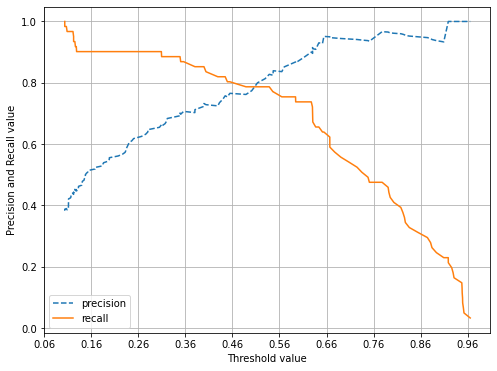

In [49]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

In [50]:
#F1 스코어
from sklearn.metrics import f1_score

f1 = f1_score(y_test, pred)
print(f1)

0.7804878048780488


In [54]:
# f1스코어 추가
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1스코어 : {3:.4f}'.format(accuracy, precision, recall, f1))
    
thresholds = [0.4,0.45,0.5,0.55,0.6]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

# 임곗값 :  0.4
오차 행렬
[[99 19]
 [10 51]]
정확도 : 0.8380, 정밀도 : 0.7286, 재현율 : 0.8361, F1스코어 : 0.7786
# 임곗값 :  0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도 : 0.8492, 정밀도 : 0.7656, 재현율 : 0.8033, F1스코어 : 0.7840
# 임곗값 :  0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도 : 0.8492, 정밀도 : 0.7742, 재현율 : 0.7869, F1스코어 : 0.7805
# 임곗값 :  0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도 : 0.8659, 정밀도 : 0.8364, 재현율 : 0.7541, F1스코어 : 0.7931
# 임곗값 :  0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도 : 0.8771, 정밀도 : 0.8824, 재현율 : 0.7377, F1스코어 : 0.8036


In [60]:
#ROC AUC
from sklearn.metrics import roc_curve

#레이블의 값이 1일때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
#반환된 임계값 배열에서 샘플로 데이터를 추출하되, 임계값을 5step으로 추출
#thresholds[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index : ', thr_index)
print('샘플 index로 추출한 임곗값 : ', np.round(thresholds[thr_index], 2))

#5step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임계값 별 FPR : ', np.round(fprs[thr_index], 3))
print('샘플 임계값 별 TPR : ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index :  [ 1  6 11 16 21 26 31 36 41 46 51]
샘플 index로 추출한 임곗값 :  [0.97 0.65 0.63 0.57 0.45 0.38 0.31 0.13 0.12 0.11 0.1 ]
샘플 임계값 별 FPR :  [0.    0.017 0.034 0.076 0.127 0.186 0.237 0.576 0.619 0.754 0.814]
샘플 임계값 별 TPR :  [0.033 0.639 0.705 0.754 0.803 0.852 0.902 0.902 0.951 0.967 1.   ]


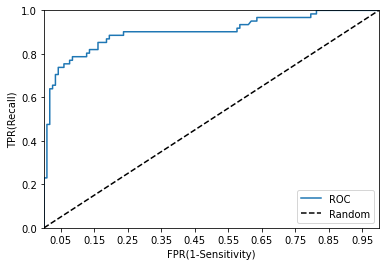

In [61]:
def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0,1],[0,1],'k--',label='Random')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    
roc_curve_plot(y_test, pred_proba[:, 1])

In [64]:
# 일반적으로 ROC곡선 자체는 FPR TPR 변화값을 보는데 사용
# 분류성능의 좋은 지표로 사용되는 것은 AUC
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print(np.round(roc_score, 3))

0.902


In [65]:
# ROC AUC 추가
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1스코어 : {3:.4f}, AUC{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))